Name: Bhavesh Chiplunkar

User id: bchiplunkar

email id: bchiplunkar7@gmail.com


# Assignment - 1 Data Visualiztion with Haberman dataset

In [9]:
#Importing librearies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [26]:
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset

hbm = pd.read_csv('haberman.csv')

In [6]:
hbm.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
# How many rows and coloumnsH

(306, 4)

In this dataset we have 306 observation with 4 attributes

In [8]:
hbm.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Above are the coloumns of dataset

### Differentiating Class and Other attributes

From general overview of dataset and with the help of website: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

My observation is we can consider **status** variable as a class attribute.

In [13]:
# How many datapoints for each class are present

hbm['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation:
From above result we can see that the data is imbalanced. 

Number of classes = 2

    which are for status value == 1 there is good life expectancy(gle)

              for status value == 2 there is bad life expectancy(ble)
              
No of datapoints for class blf gle i.e., value == 1 are 225

No of datapoints for class blf ble i.e., value == 2 are 81

# Objective:

Classify new cancer patient as belonging to one of the two classes given the three features: age_of_operation, yera_of_operation and positive_auxillary_nodes

## 2-D Scatter plot

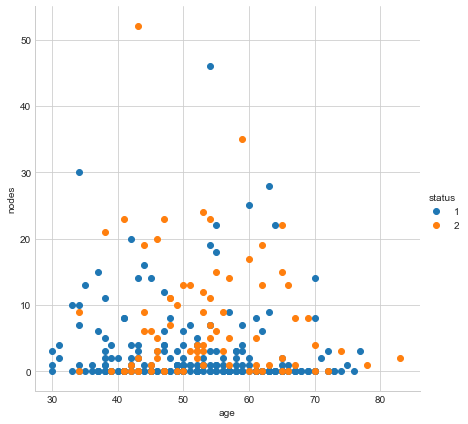

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(hbm, hue = 'status', size = 6) \
   .map(plt.scatter, 'age', 'nodes') \
   .add_legend()
plt.show()

### Observation of above plot:

From above plot we can see that it is very difficult separating staus = 1 and status = 2 datapoints as many points are overlapping

Therefore we can say that nodes and age attributes do not contribute much in classifying status = 1 patients and status = 2 patients

# Pair plots

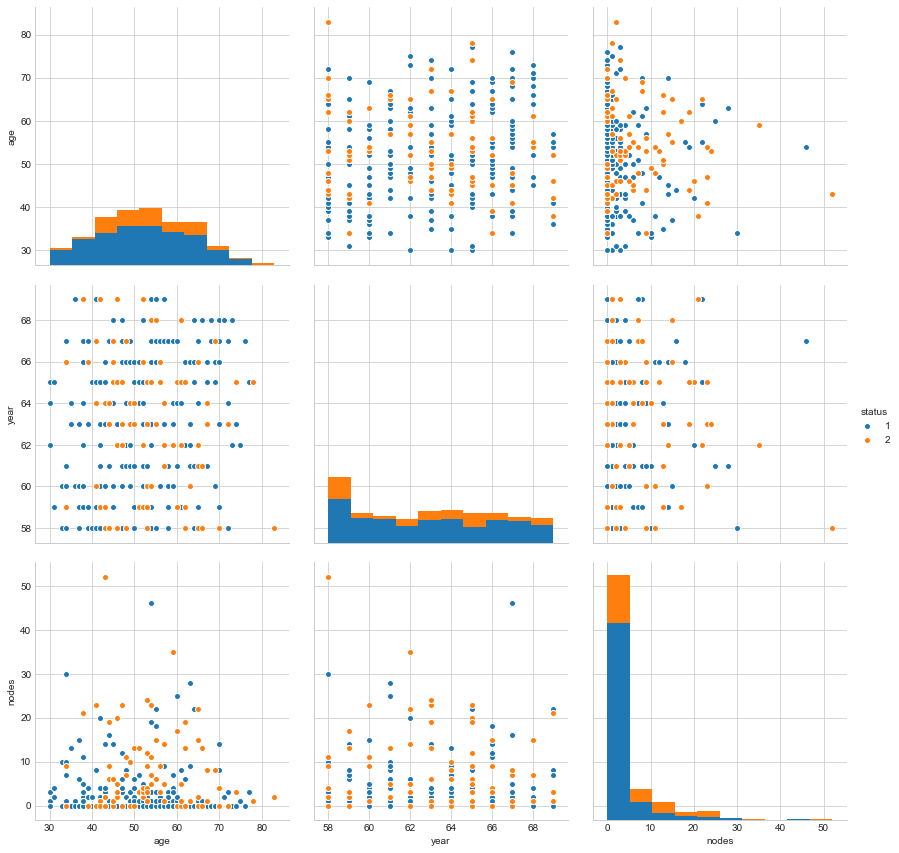

In [22]:
sns.set_style('whitegrid')
sns.pairplot(hbm, hue = 'status',size =4, vars = ['age','year','nodes'] )
plt.show()

### Observation on pair plots

From above plots we can see that many points are overlapping. No graph is able to clearly distinguish status = 1 and status = 2 patients.

Hence we cannot come to a conclusion yet that which attributes should be used to distinguish status = 1 patients from status = 2 patients

# Histogram and PDFs

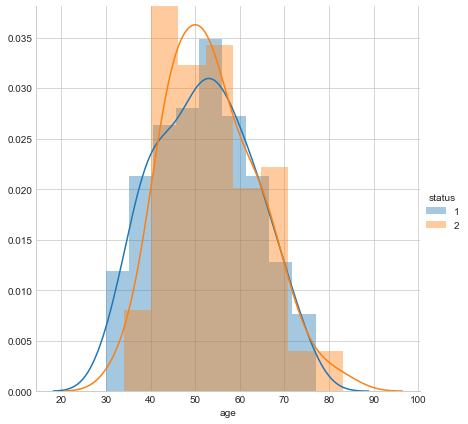

In [41]:
sns.FacetGrid(hbm, hue = 'status', size = 6) \
   .map(sns.distplot, 'age') \
   .add_legend();

### Observation for PDF of age attribute

From above we cannot clearly distinguish the status 1 and status 2 patients

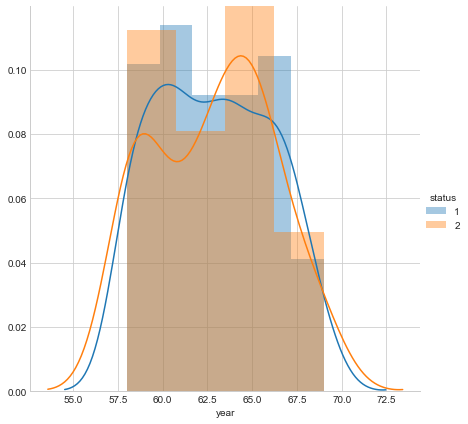

In [42]:
sns.FacetGrid(hbm, hue = 'status', size = 6) \
   .map(sns.distplot, 'year') \
   .add_legend();

### Observation for PDF of year

From above we cannot clearly distinguish the status 1 and status 2 patients

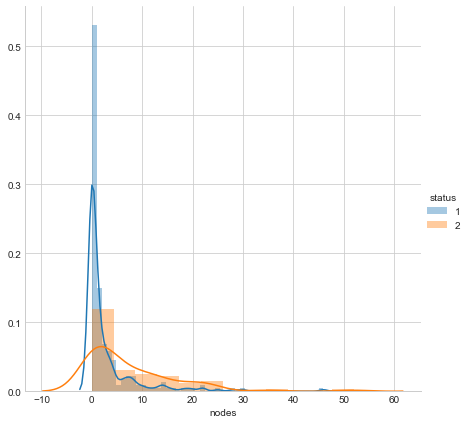

In [44]:
sns.FacetGrid(hbm, hue = 'status', size = 6) \
   .map(sns.distplot, 'nodes') \
   .add_legend();

### Observation for PDF of nodes attribute
Although from above graph we can see that there is still huge overlap between status 1 and status 2 patients.

Still my observation is since the histogram of status 1 patients for nodes is much longer we can say that if number of auxillary nodes is between 0 to 5 there is high probability that it could be status 1 patient. But we cannot confirm on that.

### Conclusion 1:

From above observation I can see that age of operation and year of operation does not play any major role in classifying statu1 and status 2 patients, whereas in case of nodes, they show some difference in probability and hence for furthur analysis I will be more focussed on auxillary_nodes variable.

# CDF

In [48]:
hbm_st1 = hbm[hbm.status == 1]
hbm_st2 = hbm[hbm.status == 2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


[]

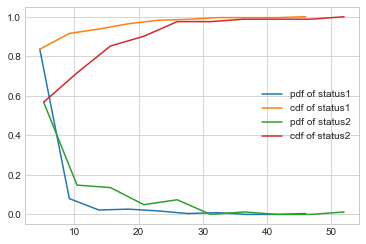

In [54]:
#Calcuating pdf

#Status == 1
counts, bin_edges = np.histogram(hbm_st1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf of status1')
plt.plot(bin_edges[1:], cdf, label = 'cdf of status1')


#Status == 2
counts, bin_edges = np.histogram(hbm_st2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'pdf of status2')
plt.plot(bin_edges[1:], cdf, label = 'cdf of status2')

plt.legend()
plt.plot()

### Observation for above CDF plot

from above graph, even though it is not very helpful still I have some observations

1) if auxillary nodes are > 46 then there is 98% to 100% chance that it is Status 2 patient but that could be extreme case of outliers

2) If auxillary nodes are 4 to 20 then there is slight high probability that it is status 1 patient which is 82% to 98%

# Mean and Standard Deviation


In [57]:
#Mean and STD of status - 1 patients for nodes attribute
print(np.mean(hbm_st1.nodes))
print(np.std(hbm_st1.nodes))

2.7911111111111113
5.857258449412131


In [58]:
#Mean and Std of status - 2 patients for nodes attribute
print(np.mean(hbm_st2.nodes))
print(np.std(hbm_st2.nodes))

7.45679012345679
9.128776076761632


### Observation

1) From above results we can say that the spread of status 1 patients is much less than status 2 patient we can also see that in histogram and PDF plot

2) Also most of status 1 patients have nodes in between 3 and 9.

3) most status 2 patients have nodes in between 2 to 16.

# Median

In [59]:
print(np.median(hbm_st1.nodes))
print(np.median(hbm_st2.nodes))

0.0
4.0


### Observation:

As median is very less than mean of number of nodes we can say that the dataset is right skewed

# Quantiles and percentile

In [62]:
print('Quantiles of status 1 ')
print(np.percentile(hbm_st1.nodes, np.arange(0,100,25)))

Quantiles of status 1 
[0. 0. 0. 3.]


In [80]:
print('53rd percentile of status 1')
print(np.percentile(hbm_st1.nodes, 53))

53rd percentile of status 1
1.0


In [81]:
print('85th percentile of status 1')
print(np.percentile(hbm_st1.nodes, 85 ))

85th percentile of status 1
6.0


### Observation:

From above observation we can say that at almost 50% of status 1 patients do not have auxillary nodes

In [82]:
print('Quantiles of status 2 ')
print(np.percentile(hbm_st2.nodes, np.arange(0,100,25)))

Quantiles of status 2 
[ 0.  1.  4. 11.]


In [94]:
print('53rd percentile of status 2')
print(np.percentile(hbm_st2.nodes, 23))

53rd percentile of status 2
0.40000000000000213


In [95]:
print('85th percentile of status 1')
print(np.percentile(hbm_st2.nodes, 85))

85th percentile of status 1
15.0


### Observation:

From above observation we can say that only 23% status - 2 patients do not have auxillary nodes

# Box Plots

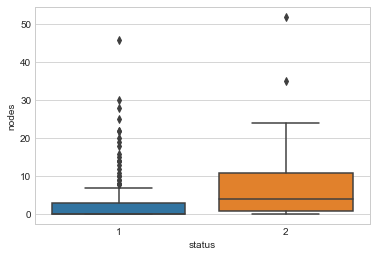

In [96]:
sns.boxplot(x = 'status', y = 'nodes', data = hbm)
plt.show()

## Observation:

#### Observation for status 1 patients

1) From above observation we can say that data for status = 1 patients is not proper as it has many excpetion(outlier) cases.

2) 50% of status patients have no nodes

3) 53% to 75% of patients have nodes in between 1 to 4

4) More than 76% patients have nodes more than 5


#### Observation for status 2 patients

1) From status 2 box plot we can say that most status 2 patients have more auxillary nodes than status 1 

## Box plot of age of patients with status

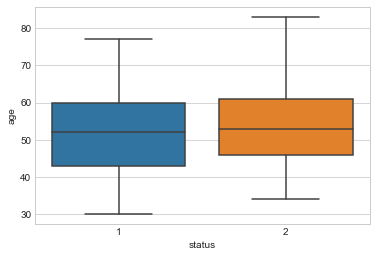

In [99]:
sns.boxplot(x = 'status', y = 'age', data = hbm)

## Observation:

Age is not helping much in classifying patient 1 and patient 2 customers

But still we can say that if age of patient is more than 78 then there is almost more than 80% chance that he is status 2 patient

# Violin plots

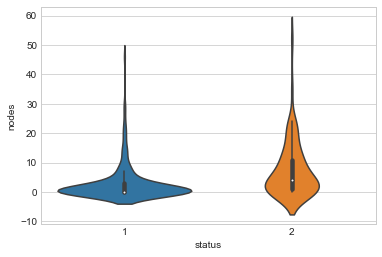

In [102]:
sns.violinplot(x='status', y='nodes', data = hbm)

## Observation:

From above we can say that most status 1 patients have 0 to 8 auxillary nodes.

And status - 2 patients have comparitively more number of auxillary nodes.

## Final Conclusion:

1) Age_of_operation and Year_of_operation do not play major role in classifying status 1 and status 2 customers

2) Status 1 patients have comparitively less number of nodes than status 2 patients.

3) The data is not sufficient to classify status 1 patients and status 2 patients.